# Imports

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Selection of categories

In [2]:
categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

In [3]:
data_train = fetch_20newsgroups(
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42
)

In [4]:
data_test = fetch_20newsgroups(
    subset="test",
    categories=categories,
    shuffle=True,
    random_state=42
)

In [5]:
data_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
len(data_test['data'])

1353

In [7]:
# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

In [8]:
# split target in a training set and a test set
y_train, y_test = data_train.target, data_test.target

In [9]:
# Create a TF-IDF Vectorizer instance
vectorizer = TfidfVectorizer(
    sublinear_tf=True,  # Use sublinear term frequency scaling (logarithmic scaling for term frequency)
    max_df=0.5,         # Ignore terms that appear in more than 50% of the documents
    min_df=5,           # Ignore terms that appear in fewer than 5 documents
    stop_words="english" # Remove English stop words (common words like "the", "and", "is" that add little value)
)

In [10]:
X_train = vectorizer.fit_transform(data_train.data)

In [11]:
X_test = vectorizer.transform(data_test.data)

In [12]:
feature_names = vectorizer.get_feature_names_out()

In [13]:
feature_names.shape

(7831,)

In [14]:
feature_names[:100]

array(['00', '000', '0005', '01', '01wb', '02', '03', '04', '0400', '05',
       '06', '07', '08', '081052', '09', '10', '100', '1000', '100m',
       '101', '102', '1024x768', '103', '104', '105', '109', '11', '110',
       '1100', '111', '112', '11292', '113', '114', '115', '11632', '117',
       '12', '120', '1200', '121', '122', '123', '125', '127', '128',
       '129', '13', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '13h', '14', '140', '1400', '141', '142', '144',
       '144843', '145', '146', '147', '149', '15', '150', '1500', '151',
       '152', '155', '1550', '16', '160', '163', '164940', '167',
       '168730', '17', '171', '172', '18', '180', '18084tm', '188', '189',
       '19', '190493200420', '1915', '192', '1950', '19549', '1958',
       '1960', '1960s', '1961'], dtype=object)

In [15]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
classifier = LogisticRegression(
    C=5,          # Regularization strength; smaller values specify stronger regularization (higher values reduce regularization)
    max_iter=1000 # Maximum number of iterations for the solver to converge
)

# Train the classifier on the training data
classifier.fit(X_train, y_train) # X_train contains the feature vectors, y_train contains the corresponding labels

LogisticRegression(C=5, max_iter=1000)

In [18]:
pred = classifier.predict(X_test)

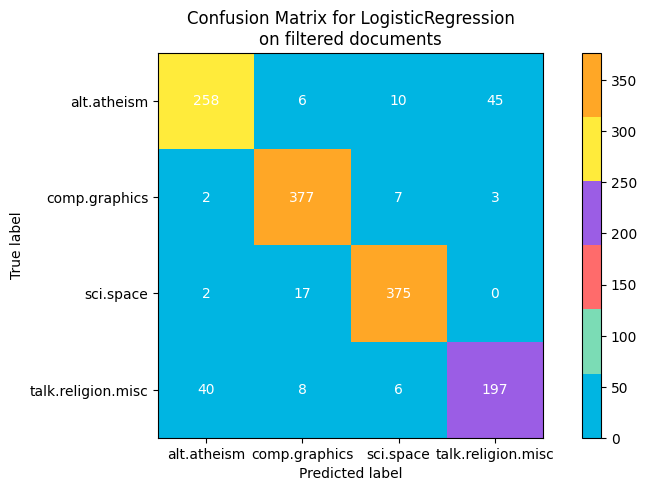

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

cmap = mcolors.ListedColormap(['#00B5E2', '#7BDCB5', '#FF6B6B', '#9B5DE5', '#FFEB3B', '#FFA726'])

fig, ax = plt.subplots(figsize=(10, 5))
cmd = ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax, cmap=cmap)
for text in cmd.text_.ravel():
    text.set_color('#FFFFFF')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {classifier.__class__.__name__}\non filtered documents"
)

In [20]:
from sklearn import metrics

def benchmark(classifier_algorithm):
    classifier_algorithm.fit(X_train, y_train)
    alg_prediction = classifier_algorithm.predict(X_test)

    score = metrics.accuracy_score(y_test, alg_prediction)
    precision_score = metrics.precision_score(y_test, alg_prediction, average=None)
    recall_score = metrics.recall_score(y_test, alg_prediction, average=None)
    f1_score = metrics.f1_score(y_test, alg_prediction, average=None)

    clf_descr = classifier_algorithm.__class__.__name__
    return clf_descr, score, precision_score, recall_score, f1_score

In [21]:
benchmark(classifier)

('LogisticRegression',
 0.8920916481892092,
 array([0.85430464, 0.92401961, 0.94221106, 0.80408163]),
 array([0.80877743, 0.96915167, 0.95177665, 0.78486056]),
 array([0.83091787, 0.94604768, 0.9469697 , 0.79435484]))